In [ ]:
import pandas as pd
import re
import spacy as sp
import matplotlib.pyplot as plt

In [ ]:
!python -m spacy download pl_core_news_sm

2024-01-28 21:36:15.363360: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-28 21:36:15.363442: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-28 21:36:15.365061: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-28 21:36:16.879520: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 37.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_sm')


In [ ]:
df = pd.read_csv('/content/dane6.csv')
nlp = sp.load('pl_core_news_sm')

In [ ]:
#Część pierwsza

#1
df['created_at'] = df['created_at'].str.replace('Mon', 'Poniedziałek') \
    .str.replace('Tue', 'Wtorek') \
    .str.replace('Wed', 'Środa') \
    .str.replace('Thu', 'Czwartek') \
    .str.replace('Fri', 'Piątek') \
    .str.replace('Sat', 'Sobota') \
    .str.replace('Sun', 'Niedziela')

#2
df['created_at'] = df['created_at'].str.replace('Jan', '01') \
    .str.replace('Feb', '02') \
    .str.replace('Mar', '03') \
    .str.replace('Apr', '04') \
    .str.replace('May', '05') \
    .str.replace('Jun', '06') \
    .str.replace('Jul', '07') \
    .str.replace('Aug', '08') \
    .str.replace('Sep', '09') \
    .str.replace('Oct', '10') \
    .str.replace('Nov', '11') \
    .str.replace('Dec', '12')

#3
all_tweet_links = df['tweet_url'].tolist()

#4
urls_without_nan = df.dropna(subset=['urls'])
list_of_urls = urls_without_nan['urls'].tolist()

#5
media_without_na = df.dropna(subset=['media'])
list_of_media = media_without_na['media'].tolist()

#6
stopwords = ['a', 'i', 'to', 'oraz', 'w', 'z', 'na']

df_tweets['text'].replace ('stopwords', '')

def no_stopwords(text):
    doc = nlp(text)
    return ' '.join([token.text for token in doc if not token.is_stop])

df['text_without_stopwords'] = df['text'].apply(no_stopwords)

In [ ]:
#Część druga

#1
top5_likes = df.nlargest(5, 'favorite_count')
top5_likes

#2
top5_retweets = df.nlargest(5, 'retweet_count')
top5_retweets
#3
niewrażliwe_tweety = df[df['possibly_sensitive'] == True]
niewrażliwe_tweety

#4
df['user_created_at'] = pd.to_datetime(df['user_created_at'], format='%a %b %d %H:%M:%S +0000 %Y')
najwcześniejszy_użytkownik = df.loc[df['user_created_at'].idxmin()]
nazwa_użytkownika = najwcześniejszy_użytkownik['user_name']
nazwa_użytkownika

#5
najwięcej_followersów = df.nlargest (1,'user_followers_count')
najwięcej_followersów

#6
tweety_zweryfikowanych_użytkowników = df[df['user_verified'] == True]
tweety_zweryfikowanych_użytkowników

#7
df['created_at'] = pd.to_datetime(df['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')
df['day_of_week'] = df['created_at'].dt.day_name()
naj_dni_tygodnia = df['day_of_week'].mode().values[0]
naj_dni_tygodnia

'Thursday'

In [ ]:
#Część trzecia

#1 2 i 3

persons = []
locations = []
organizations = []

for entity in df['text']:
    doc = nlp(entity)
    persons_in_row = [ent.text for ent in doc.ents if ent.label_ == 'persName']
    locations_in_row = [ent.text for ent in doc.ents if ent.label_ == 'placeName']
    organizations_in_row = [ent.text for ent in doc.ents if ent.label_ == 'orgName']

    persons.append(persons_in_row)
    locations.append(locations_in_row)
    organizations.append(organizations_in_row)

df['persons'] = persons
df['locations'] = locations
df['organizations'] = organizations

0                       []
1                       []
2                       []
3                       []
4                       []
               ...        
1391                    []
1392                    []
1393    [Krzesimir Dębski]
1394                    []
1395                    []
Name: persons, Length: 1396, dtype: object

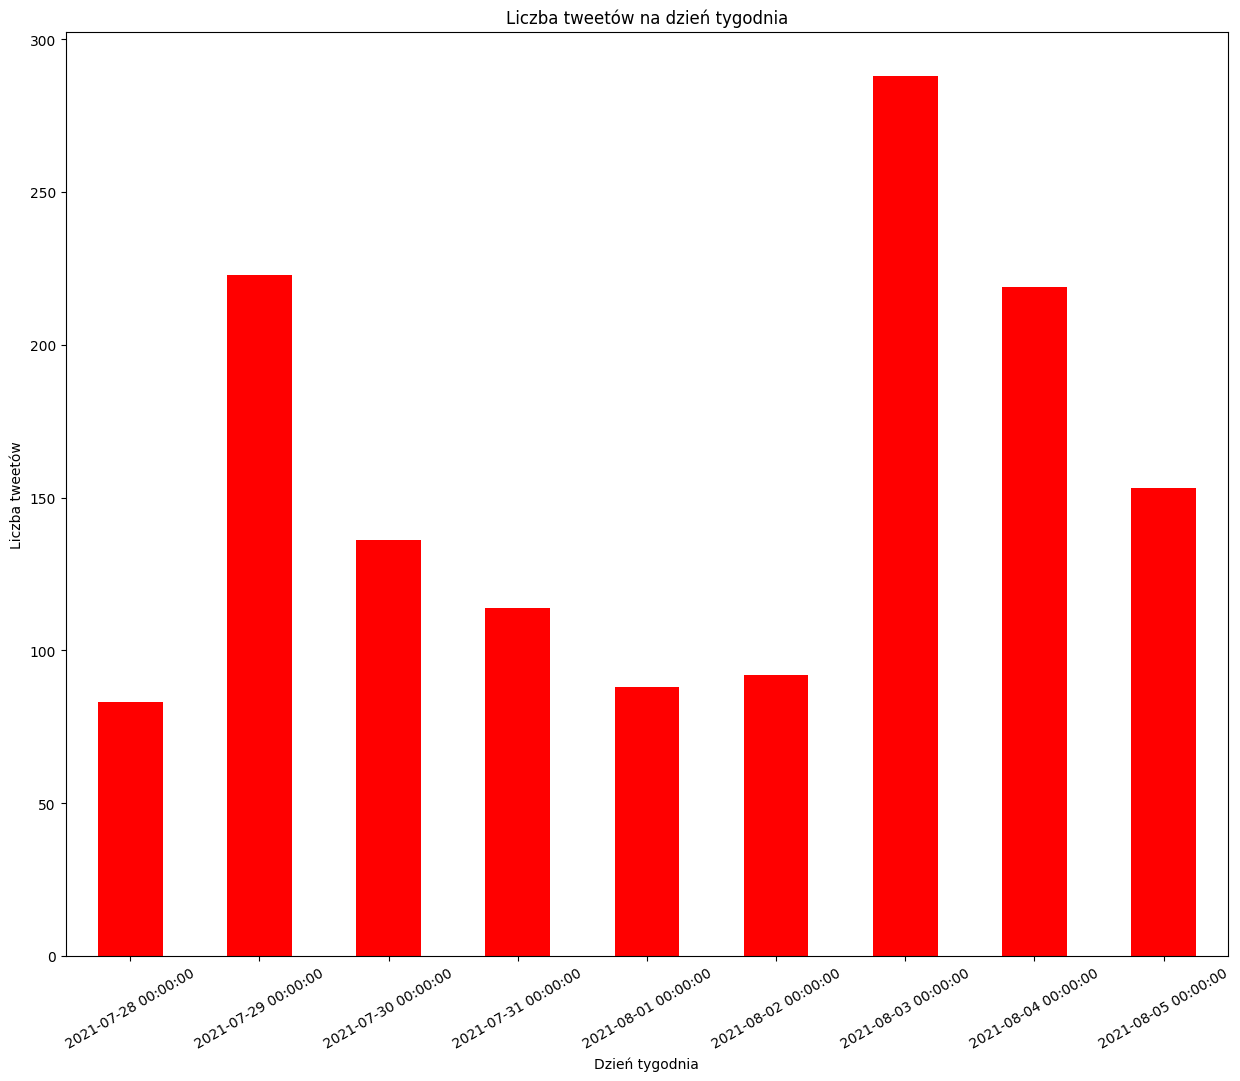

In [ ]:
df = pd.read_csv('/content/dane6.csv')
data = {'created_at': ['Tue Jul 17 17:39:49 +0000 2018',
                              'Wed Jul 18 12:20:30 +0000 2018',
                              'Thu Jul 19 08:45:15 +0000 2018',
                              'Fri Jul 20 22:10:05 +0000 2018',
                              'Sat Jul 21 18:30:40 +0000 2018',
                              'Sun Jul 22 14:55:22 +0000 2018',
                              'Mon Jul 23 09:25:11 +0000 2018']}

df['created_at'] = pd.to_datetime(df['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

df.set_index('created_at', inplace=True)

plt.figure(figsize=(15, 12))
df.resample('D').size().plot(kind='bar', color='red')
plt.title('Liczba tweetów na dzień tygodnia')
plt.xlabel('Dzień tygodnia')
plt.ylabel('Liczba tweetów')
plt.xticks(rotation=30)
plt.show()